平行移動と主軸変換
---
by ほげにむし

2次関数$f(x,y)$は、適当な変数変換を施すと$f(x',y')=\lambda_1x'^2+\lambda_2y'^2+c$の形に変形できる。
こうすることで楕円は原点が中心となり、長軸、短軸がそれぞれ$x$、$y$方向になる。

この変数変換は、2ステップで行われる。
1. 平行移動
2. 主軸変換

順に説明していく。


## 平行移動

まずは曲線を平行移動し、$x,y$の1次の項を消す。


曲線を一つ定義しよう。

In [120]:
import sympy as sym
sym.init_printing()
x,y = sym.symbols('x y')
f = 6*x**2 +4*x*y +3*y**2 +28*x +14*y -46
f

曲線の概形は以下のようになる。

<IPython.core.display.Javascript object>


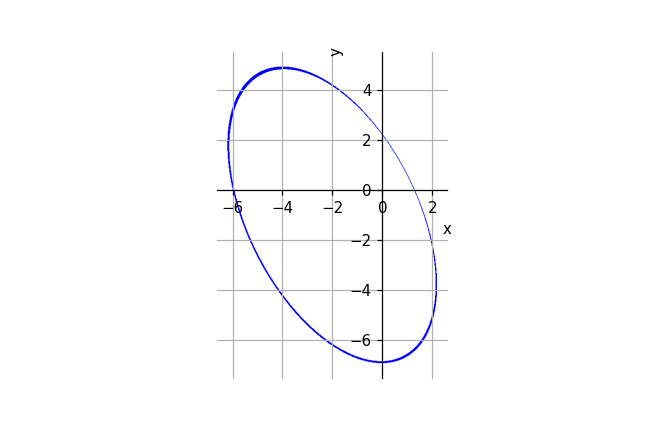

In [121]:
%matplotlib notebook
p=sym.plot_implicit(f,(x,-10,10),(y,-10,10))
fg, ax = p._backend.fig, p._backend.ax 
ax.axis('tight')  # list of float or {‘on’, ‘off’, ‘equal’, ‘tight’, ‘scaled’, ‘normal’, ‘auto’, ‘image’, ‘square’}
ax.set_aspect("equal")
ax.grid(True)


この図形は楕円で、2本の直線で線対称となる。これらの直線を主軸という。
また、主軸の交点で楕円は点対称となる。

主軸の交点を原点にもってこよう。
この図形を$x$方向に$2$、$y$方向に$1$だけずらす。
$(x,y)=(x_1-2,y_1-1)$として計算する。

In [122]:
x_1, y_1 = sym.symbols('x_1 y_1')
g = f.subs(x,x_1-2).subs(y,y_1-1)
g.expand()

$x$と$y$の項が消えた。

これも描画してみよう。

<IPython.core.display.Javascript object>


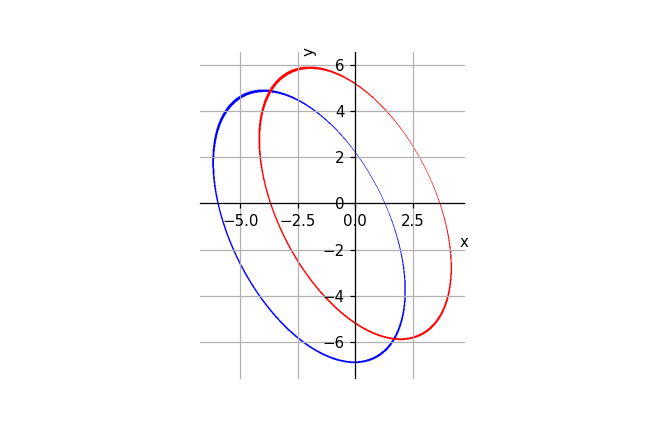

In [123]:
p1=sym.plot_implicit(f,(x,-10,10),(y,-10,10), show=False, line_color='b')
p2=sym.plot_implicit(g.subs(x_1,x).subs(y_1,y),(x,-10,10),(y,-10,10),show=False, line_color='r')
p1.extend(p2)
p1.show()
fg, ax = p1._backend.fig, p1._backend.ax 
ax.axis('tight')  
ax.set_aspect('equal') 
ax.grid(True)

楕円の中心が原点に移っている。

さて、どうやってこの平行移動を得るのだろうか？教科書p.45を参照にしてほしいが、概要を以下にまとめる。

2次曲面の一般形は
${\bf H} \in \mathbf{R}^{n\times n}$、$h_{ij}=h_{ji} ({\bf H}^T={\bf H})$、${\bf a}, {\bf x}\in {\bf R}^n$とすると、

\begin{equation}
    f(\mathbf{x}) = \frac{1}{2} (\mathbf{x},\mathbf{H}\mathbf{x})
                 +(\mathbf{a},\mathbf{x})+c
\end{equation}

と書くことができる。ここで平行移動量を${\bf p}\in {\bf R}^n$とすると、

\begin{align}
    f(\mathbf{x}-\mathbf{p}) =& \frac{1}{2} (\mathbf{x}-\mathbf{p},\mathbf{H}\mathbf{x}-\mathbf{p})
                     +(\mathbf{a},\mathbf{x}-\mathbf{p})+c \\
                 =& \frac{1}{2}(\mathbf{x}, \mathbf{Hx}) - (\mathbf{Hp},\mathbf{x}) + (\mathbf{a},\mathbf{x})
                      + \frac{1}{2} (\mathbf{p},\mathbf{Hp})-(\mathbf{a},\mathbf{p}) +c 
\end{align}

$\mathbf{x}$の1次の項が任意のベクトル$\mathbf{x}$について消えてほしいので、

\begin{equation}
\mathbf{Hp}= \mathbf{x}
\end{equation}

となる$\mathbf{p}$を、連立方程式を解いて求めればよい。



## 主軸変換


今度は、$x_2$と$y_2$を以下になるように決める。

\begin{equation}
  \begin{pmatrix}
    x_1 \\
    y_1 
  \end{pmatrix}
  =
  \begin{pmatrix}
  1/\sqrt5 & -2/\sqrt5 \\ 2/\sqrt5 & 1/\sqrt5
  \end{pmatrix}
  \begin{pmatrix}
  x_2\\y_2
  \end{pmatrix}
\end{equation}

行列内の二つの縦ベクトルが単位ベクトル、かつ直交しているので、
この変換は回転変換になる。

上の行列は、自身の転置が逆行列になるので、
\begin{equation}
  \begin{pmatrix}
    x_2 \\ y_2 
  \end{pmatrix}
  =
  \begin{pmatrix}
  1/\sqrt5 & 2/\sqrt5 \\ -2/\sqrt5 & 1/\sqrt5
  \end{pmatrix}
  \begin{pmatrix}
  x_1 \\ y_1
  \end{pmatrix}
\end{equation}
を代入しよう。


In [127]:
x_2,y_2 = sym.symbols('x_2 y_2')
h=g.subs(x_1,  x_2/sym.sqrt(5)+2*y_2/sym.sqrt(5)).subs(y_1,-2*x_2/sym.sqrt(5) + y_2/sym.sqrt(5))
h.expand()

$xy$の項が消えた。

これをプロットしてみよう。

<IPython.core.display.Javascript object>


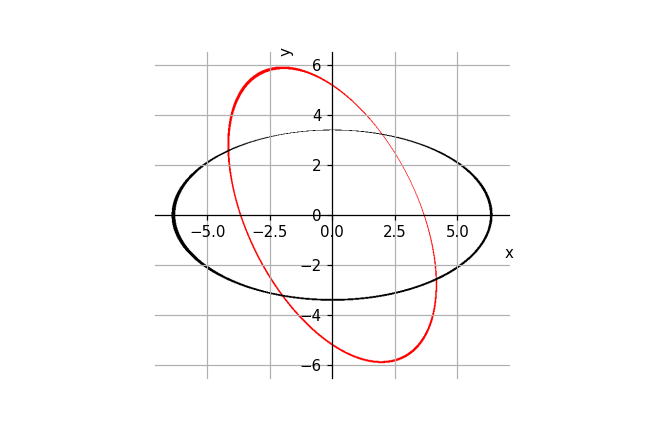

In [128]:
p1=sym.plot_implicit(g.subs(x_1,x).subs(y_1,y),(x,-10,10),(y,-10,10),show=False, line_color='r')
p2=sym.plot_implicit(h.subs(x_2,x).subs(y_2,y),(x,-10,10),(y,-10,10),show=False, line_color='k')
p1.extend(p2)
p1.show()
fg, ax = p1._backend.fig, p1._backend.ax 
ax.axis('tight')
ax.set_aspect('equal')
ax.grid(True)

長軸、短軸が$x$軸、$y$軸と一致したことがわかる。

さて、どうしてこのようなことができるのだろう？

$\mathbf{u}_1, \cdots , \mathbf{u}_n$が行列$\mathbf{H}$の固有値$\lambda_1, \cdots, \lambda_n$に対する固有ベクトルの正規直交系であるとき、
これらを順に列とする$n\times n$行列を
$$ \mathbf{U}= \bigl(\mathbf{u_1} \ \ \mathbf{u_2}\ \ \cdots \ \ \mathbf{u_n}\bigr)$$
とする。このとき、
\begin{equation}
\mathbf{U}^T\mathbf{A}\mathbf{U}=
\begin{pmatrix}
\lambda_1 & & & \\
 & \lambda_2 & & \\
 & & \ddots & \\
 & & & \lambda_n 
 \end{pmatrix}
\end{equation}
と表せるのであった。

したがって、2次形式の標準形は
\begin{align}
(\mathbf{x},\mathbf{H}\mathbf{x})&=(\mathbf{x},
\mathbf{U}^T\begin{pmatrix}
\lambda_1 & & & \\
 & \lambda_2 & & \\
 & & \ddots & \\
 & & & \lambda_n 
 \end{pmatrix}\mathbf{U}\mathbf{x})\\
&=(\mathbf{U}\mathbf{x},
\begin{pmatrix}
\lambda_1 & & & \\
 & \lambda_2 & & \\
 & & \ddots & \\
 & & & \lambda_n 
 \end{pmatrix}\mathbf{U}\mathbf{x})
\end{align}

となり、$\mathbf{x}'=\mathbf{Ux}$と変数変換することによって、$x_i^2$の項のみで表現できる。

またこのとき、固有値のを大きい順番に並べ、それに対応する正規直交化した固有ベクトル$\mathbf{u}_1,\mathbf{u}_2$は
それぞれ、長軸、短軸の向き示している。そして固有値は、楕円の長軸、短軸の長さの2乗を表している。

固有値を得る方法、この議論の詳細は教科書pp.23-32を参照すること。

## 応用例

データからその分散が大きくなるように軸を設定して変数変換を行う、主成分分析という手法がある。

主成分分析はデータを行列で表し、その固有値と固有ベクトルを求める。
固有ベクトルはデータをよく表す軸、固有値の大きさはデータをどのくらい良く表しているかを表す寄与率となる。

$n$次元のデータの軸を寄与率の大きい固有ベクトルをいくつか選び、それをつｋで表現することで、少ない次元でデータをそれらしく表現することができる。


## まとめ

ここでは、平行移動と主軸変換によって、一般の2次曲線がその標準形で表現できることを示した。